# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [102]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [103]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [104]:
cities

['hasaki',
 'broome',
 'punta arenas',
 'faanui',
 'valdivia',
 'pevek',
 'qaanaaq',
 'artyk',
 'tuktoyaktuk',
 'khatanga',
 'butaritari',
 'sinnamary',
 'thompson',
 'taolanaro',
 'oranjestad',
 'attawapiskat',
 'hobart',
 'ushuaia',
 'mataura',
 'leningradskiy',
 'mahebourg',
 'calbuco',
 'port elizabeth',
 'redmond',
 'lebu',
 'dwarka',
 'vaini',
 'chuy',
 'hermanus',
 'barrow',
 'arraial do cabo',
 'ust-omchug',
 'livingstone',
 'kahului',
 'kapaa',
 'luderitz',
 'saint george',
 'saldanha',
 'seoul',
 'airai',
 'aberdeen',
 'nikolskoye',
 'puerto ayora',
 'bolungarvik',
 'rikitea',
 'saint-philippe',
 'tapaua',
 'avarua',
 'san quintin',
 'illoqqortoormiut',
 'anloga',
 'kenai',
 'lusambo',
 'chokurdakh',
 'turukhansk',
 'atuona',
 'bathsheba',
 'hilo',
 'hatillo',
 'boissevain',
 'eau claire',
 'kathu',
 'fortuna',
 'mogzon',
 'sentyabrskiy',
 'yellowknife',
 'talnakh',
 'sao miguel do tapuio',
 'albany',
 'lakes entrance',
 'sungaipenuh',
 'san cristobal',
 'leiyang',
 'meyungs'

In [105]:
url = "http://api.openweathermap.org/data/2.5/weather?q="
query_url = url + cities[0] + "&appid=" + weather_api_key + "&units=imperial"

response = requests.get(query_url)
weather_json = response.json()
weather_json
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 35.7333, 'lon': 140.8333},
 'dt': 1635377839,
 'id': 2112802,
 'main': {'feels_like': 56.43,
          'grnd_level': 1015,
          'humidity': 62,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 58.01,
          'temp_max': 59.29,
          'temp_min': 57.6},
 'name': 'Hasaki',
 'sys': {'country': 'JP',
         'id': 7955,
         'sunrise': 1635368071,
         'sunset': 1635407173,
         'type': 1},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 46, 'gust': 14.7, 'speed': 11.86}}


In [106]:
# base url
url = "http://api.openweathermap.org/data/2.5/weather?q="

#lists 
record_count = 0
weather = []

#print log Beginning Data Retrieval     -----------------------------
print("Beginning Data Retrieval")
print("-----------------------------")
#for loop for data with try "processing Record" and except "City not found. Skipping..."#
for city in cities:
    query_url = url + city + "&appid=" + weather_api_key + "&units=imperial"
    #get weather data
    response = requests.get(query_url)
    weather_json = response.json()
    record_count = record_count + 1
    try:
    #insert a time function as needed with set?
        lat = weather_json['coord']['lat']
        lng = weather_json['coord']['lon']
        maxtemp = weather_json["main"]["temp_max"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        windspeed = weather_json["wind"]["speed"]
        country = weather_json["sys"]["country"]
        city_name = weather_json ["name"]
        date = weather_json["dt"]
        weather.append({"City" : city_name,
                                    "Latitude": lat,
                                    "Longitude": lng,
                                    "Max Temp": maxtemp,
                                    "Humidity": humidity,
                                    "Cloudiness": cloudiness,
                                    "Wind Speed" : windspeed,
                                    "Country": country,
                                    "Date": date})
        print(f'Processing Record {record_count} | {city}') 
    except KeyError:
        print(f'{city} not found. Skipping...')
        pass
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")



Beginning Data Retrieval
-----------------------------
Processing Record 1 | hasaki
Processing Record 2 | broome
Processing Record 3 | punta arenas
Processing Record 4 | faanui
Processing Record 5 | valdivia
Processing Record 6 | pevek
Processing Record 7 | qaanaaq
artyk not found. Skipping...
Processing Record 9 | tuktoyaktuk
Processing Record 10 | khatanga
Processing Record 11 | butaritari
Processing Record 12 | sinnamary
Processing Record 13 | thompson
taolanaro not found. Skipping...
Processing Record 15 | oranjestad
attawapiskat not found. Skipping...
Processing Record 17 | hobart
Processing Record 18 | ushuaia
Processing Record 19 | mataura
Processing Record 20 | leningradskiy
Processing Record 21 | mahebourg
Processing Record 22 | calbuco
Processing Record 23 | port elizabeth
Processing Record 24 | redmond
Processing Record 25 | lebu
Processing Record 26 | dwarka
Processing Record 27 | vaini
Processing Record 28 | chuy
Processing Record 29 | hermanus
Processing Record 30 | barro

Processing Record 249 | dauriya
lolua not found. Skipping...
Processing Record 251 | cordoba
Processing Record 252 | atar
Processing Record 253 | alta floresta
Processing Record 254 | georgetown
Processing Record 255 | yumen
Processing Record 256 | sokol
Processing Record 257 | victor harbor
Processing Record 258 | marawi
Processing Record 259 | klyuchi
barentsburg not found. Skipping...
Processing Record 261 | hailun
Processing Record 262 | norilsk
Processing Record 263 | codrington
amderma not found. Skipping...
mrirt not found. Skipping...
Processing Record 266 | ganzhou
phan rang not found. Skipping...
Processing Record 268 | deputatskiy
bolintinu-din-vale not found. Skipping...
Processing Record 270 | usinsk
Processing Record 271 | vila velha
Processing Record 272 | oranjemund
Processing Record 273 | maumere
Processing Record 274 | goya
Processing Record 275 | buchanan
Processing Record 276 | khash
Processing Record 277 | high level
Processing Record 278 | beloha
Processing Record

Processing Record 493 | gull lake
tumannyy not found. Skipping...
Processing Record 495 | umm lajj
Processing Record 496 | bardiyah
Processing Record 497 | sanchursk
Processing Record 498 | alofi
Processing Record 499 | martil
Processing Record 500 | canyon lake
Processing Record 501 | vannes
Processing Record 502 | visnes
Processing Record 503 | southbridge
mahadday weyne not found. Skipping...
Processing Record 505 | moerai
Processing Record 506 | takoradi
Processing Record 507 | mahendranagar
Processing Record 508 | riacho de santana
Processing Record 509 | gat
Processing Record 510 | marica
Processing Record 511 | grand-santi
Processing Record 512 | shellbrook
Processing Record 513 | barahona
Processing Record 514 | christchurch
malwan not found. Skipping...
Processing Record 516 | columbus
satitoa not found. Skipping...
Processing Record 518 | kabare
Processing Record 519 | upington
burica not found. Skipping...
Processing Record 521 | el dorado
tuggurt not found. Skipping...
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [107]:
#create DF City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
weather_df = pd.DataFrame(weather)
weather_df

#save to csv
weather_df.to_csv("WeatherPy/cityweather.csv")


In [108]:
weather_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,20.329232,19.865979,59.428436,73.174545,53.856364,7.204764,1.635378e+09
std,33.581213,91.797187,21.772330,19.676956,38.244531,4.960496,9.015897e+01
min,-54.800000,-175.200000,-14.190000,13.000000,0.000000,0.000000,1.635377e+09
25%,-6.767475,-62.847250,44.737500,63.000000,14.000000,3.440000,1.635378e+09
50%,22.605700,24.664450,65.245000,77.000000,58.000000,6.260000,1.635378e+09
75%,50.008375,102.276150,77.260000,88.000000,92.000000,9.795000,1.635378e+09
max,78.218600,178.416700,93.970000,100.000000,100.000000,26.710000,1.635378e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [109]:
#skipping step due to nothing being greater than 100% per the max humidity above


In [110]:
#  Get the indices of cities that have humidity over 100%.


In [111]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [112]:
weather_df.head()


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hasaki,35.7333,140.8333,59.29,62,100,11.86,JP,1635377839
1,Broome,42.2506,-75.8330,50.38,85,75,3.00,US,1635377839
2,Punta Arenas,-53.1500,-70.9167,51.91,50,0,13.80,CL,1635377713
3,Faanui,-16.4833,-151.7500,79.74,78,67,6.11,PF,1635377840
4,Valdivia,-39.8142,-73.2459,59.09,97,2,3.06,CL,1635377545


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

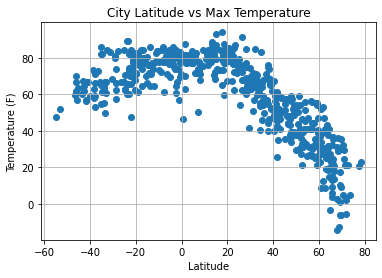

In [113]:
#plot lat vs max tep scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker = "o")

#charting labels and grid
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("WeatherPy/Lat_MaxTemp.png")

#show plt
plt.show()

## Latitude vs. Humidity Plot

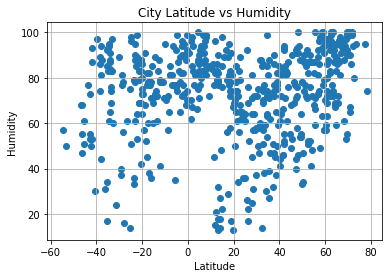

In [114]:
#plot lat vs humidity scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker = "o")

#charting labels and grid
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("WeatherPy/Lat_Humidity.png")

#show plt
plt.show()

## Latitude vs. Cloudiness Plot

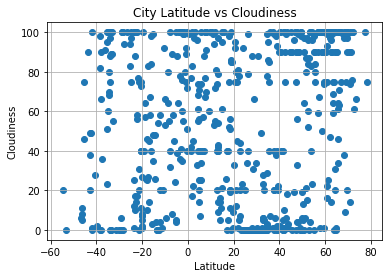

In [115]:
#plot lat vs clouds scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker = "o")

#charting labels and grid
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("WeatherPy/Lat_Cloudiness.png")

#show plt
plt.show()

## Latitude vs. Wind Speed Plot

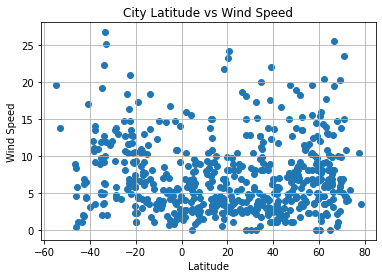

In [116]:
#plot lat vs windspeed scatter plot
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker = "o")

#charting labels and grid
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("WeatherPy/Lat_Wind.png")

#show plt
plt.show()

## Linear Regression

In [117]:
#loc fuction for northern hemishere 
n_hemi = weather_df.loc[weather_df["Latitude"]>=0]

n_hemi

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hasaki,35.7333,140.8333,59.29,62,100,11.86,JP,1635377839
1,Broome,42.2506,-75.8330,50.38,85,75,3.00,US,1635377839
5,Pevek,69.7008,170.3133,9.12,90,100,9.84,RU,1635377664
6,Qaanaaq,77.4840,-69.3632,20.59,95,100,10.33,GL,1635377792
7,Tuktoyaktuk,69.4541,-133.0374,30.20,100,90,6.91,CA,1635377731
...,...,...,...,...,...,...,...,...,...
539,Ostrovnoy,68.0531,39.5131,31.32,61,99,14.72,RU,1635377991
540,Severnyy,50.6770,36.5532,39.24,87,0,6.71,RU,1635377992
542,Abū Zabad,12.3500,29.2500,79.00,21,81,8.99,SD,1635377992
546,Venice of the Philippines,4.6628,119.3928,83.53,71,56,5.35,PH,1635377993


In [118]:
#loc function for southern hemisphere 
s_hemi = weather_df.loc[weather_df["Latitude"]<0]

s_hemi

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Punta Arenas,-53.1500,-70.9167,51.91,50,0,13.80,CL,1635377713
3,Faanui,-16.4833,-151.7500,79.74,78,67,6.11,PF,1635377840
4,Valdivia,-39.8142,-73.2459,59.09,97,2,3.06,CL,1635377545
13,Hobart,-42.8794,147.3294,67.12,73,20,1.99,AU,1635377654
14,Ushuaia,-54.8000,-68.3000,47.86,57,20,19.57,AR,1635377458
...,...,...,...,...,...,...,...,...,...
543,Murchison,-41.8000,172.3333,66.56,53,100,4.38,NZ,1635377992
544,Fare,-16.7000,-151.0167,79.81,77,58,7.78,PF,1635377993
545,Ambunti,-4.2365,142.8448,82.29,87,64,0.96,PG,1635377993
547,Chicama,-7.8447,-79.1469,61.34,81,32,8.55,PE,1635377994


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

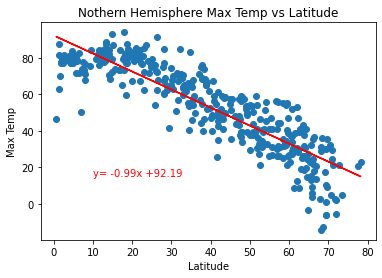

The r-value is: -0.8765433543313476


In [122]:
#scatter plot the r value Northern Hemisphere - Max Temp vs. Latitude
x_values = n_hemi["Latitude"]
y_values = n_hemi["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Nothern Hemisphere Max Temp vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(10,15), color = "red")

#save the figure
plt.savefig("WeatherPy/N_Temp_Lat.png")

#show plt
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

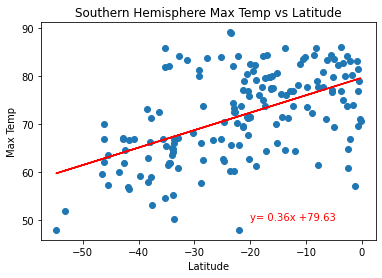

The r-value is: 0.5297919641043229


In [125]:
#scatter plot the r value Southern Hemisphere - Max Temp vs. Latitude
x_values = s_hemi["Latitude"]
y_values = s_hemi["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere Max Temp vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-20,50), color = "red")

#save the figure
plt.savefig("WeatherPy/S_Temp_Lat.png")

#show plt
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

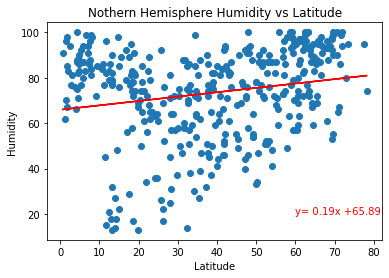

The r-value is: 0.1985323539038854


In [127]:
#scatter plot the r value Northern Hemisphere - Humididty vs. Latitude
x_values = n_hemi["Latitude"]
y_values = n_hemi["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Nothern Hemisphere Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(60,20), color = "red")

#save the figure
plt.savefig("WeatherPy/N_Humidity_Lat.png")

#show plt
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

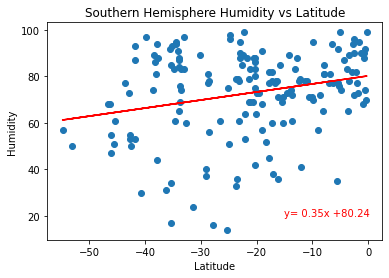

The r-value is: 0.250048338034521


In [129]:
#scatter plot the r value Southern Hemisphere - Humididty vs. Latitude
x_values = s_hemi["Latitude"]
y_values = s_hemi["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-15,20), color = "red")

#save the figure
plt.savefig("WeatherPy/S_Humidity_Lat.png")

#show plt
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

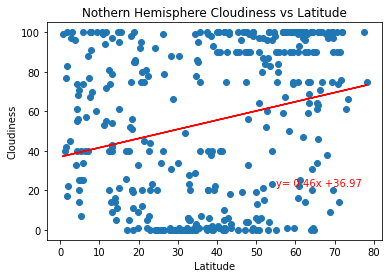

The r-value is: 0.24754828636951076


In [131]:
#scatter plot the r value Northern Hemisphere - clouds vs. Latitude
x_values = n_hemi["Latitude"]
y_values = n_hemi["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Nothern Hemisphere Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(55,22), color = "red")

#save the figure
plt.savefig("WeatherPy/N_Clouds_Lat.png")

#show plt
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

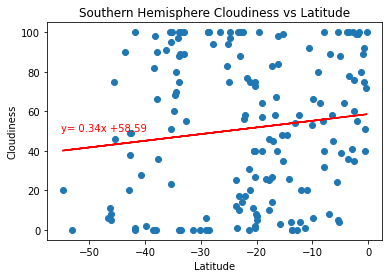

The r-value is: 0.12453654246617518


In [133]:
#scatter plot the r value southern Hemisphere - clouds vs. Latitude
x_values = s_hemi["Latitude"]
y_values = s_hemi["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-55,50), color = "red")

#save the figure
plt.savefig("WeatherPy/S_Clouds_Lat.png")

#show plt
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

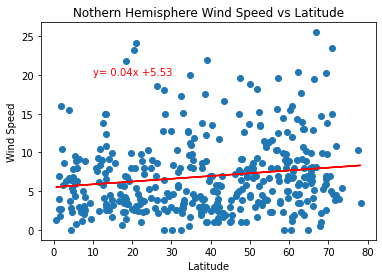

The r-value is: 0.1537812757095349


In [136]:
#scatter plot the r value Northern Hemisphere - wind vs. Latitude
x_values = n_hemi["Latitude"]
y_values = n_hemi["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Nothern Hemisphere Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(10,20), color = "red")

#save the figure
plt.savefig("WeatherPy/N_Winds_Lat.png")

#show plt
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

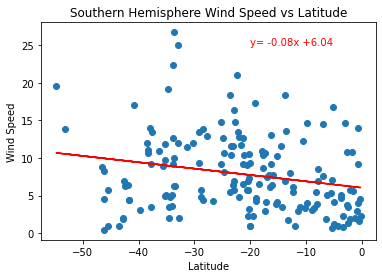

The r-value is: -0.21938269282120357


In [140]:
#scatter plot the r value Southern Hemisphere - wind vs. Latitude
x_values = s_hemi["Latitude"]
y_values = s_hemi["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.title("Southern Hemisphere Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-20,25), color = "red")

#save the figure
plt.savefig("WeatherPy/S_Winds_Lat.png")

#show plt
plt.show()
print(f"The r-value is: {rvalue}")

✓ Analysis correctly describes 3 observable trends
✓ Analysis provides sound reasoning to back up why all 3 trends are occurring. 
